In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import glob
import os
import random

In [2]:
import cv2 as cv

## Image data 

In [3]:
directories = glob.glob("C:/Users/mtwhe/OneDrive/Desktop/MATH7243 - ML and Stat Theory/Final Project/renders/*")
print(directories)

['C:/Users/mtwhe/OneDrive/Desktop/MATH7243 - ML and Stat Theory/Final Project/renders\\epidural', 'C:/Users/mtwhe/OneDrive/Desktop/MATH7243 - ML and Stat Theory/Final Project/renders\\intraparenchymal', 'C:/Users/mtwhe/OneDrive/Desktop/MATH7243 - ML and Stat Theory/Final Project/renders\\intraventricular', 'C:/Users/mtwhe/OneDrive/Desktop/MATH7243 - ML and Stat Theory/Final Project/renders\\multi', 'C:/Users/mtwhe/OneDrive/Desktop/MATH7243 - ML and Stat Theory/Final Project/renders\\normal', 'C:/Users/mtwhe/OneDrive/Desktop/MATH7243 - ML and Stat Theory/Final Project/renders\\subarachnoid', 'C:/Users/mtwhe/OneDrive/Desktop/MATH7243 - ML and Stat Theory/Final Project/renders\\subdural']


In [4]:
nrows = len(directories)
ncols = 4

In [5]:
count_images = 0
for i, folder_path in enumerate(directories):
    for j, folder in enumerate(glob.glob(folder_path+"/*")):
        all_files = glob.glob(folder+'/*')
        subfolder_path = folder.split('/')[-2:]
        hemorrhage_type, window = subfolder_path
        print(f"folder -> {'/'.join(subfolder_path): >40}, {len(all_files):>7} files")
        count_images += len(all_files)
    print('------------------------------------------------')
print(f'total number of images: {count_images}')

folder -> Final Project/renders\epidural\brain_bone_window,    1694 files
folder -> Final Project/renders\epidural\brain_window,    1694 files
folder -> Final Project/renders\epidural\max_contrast_window,    1694 files
folder -> Final Project/renders\epidural\subdural_window,    1694 files
------------------------------------------------
folder -> Final Project/renders\intraparenchymal\brain_bone_window,   15664 files
folder -> Final Project/renders\intraparenchymal\brain_window,   15664 files
folder -> Final Project/renders\intraparenchymal\max_contrast_window,   15664 files
folder -> Final Project/renders\intraparenchymal\subdural_window,   15664 files
------------------------------------------------
folder -> Final Project/renders\intraventricular\brain_bone_window,    9878 files
folder -> Final Project/renders\intraventricular\brain_window,    9878 files
folder -> Final Project/renders\intraventricular\max_contrast_window,    9878 files
folder -> Final Project/renders\intraventricu

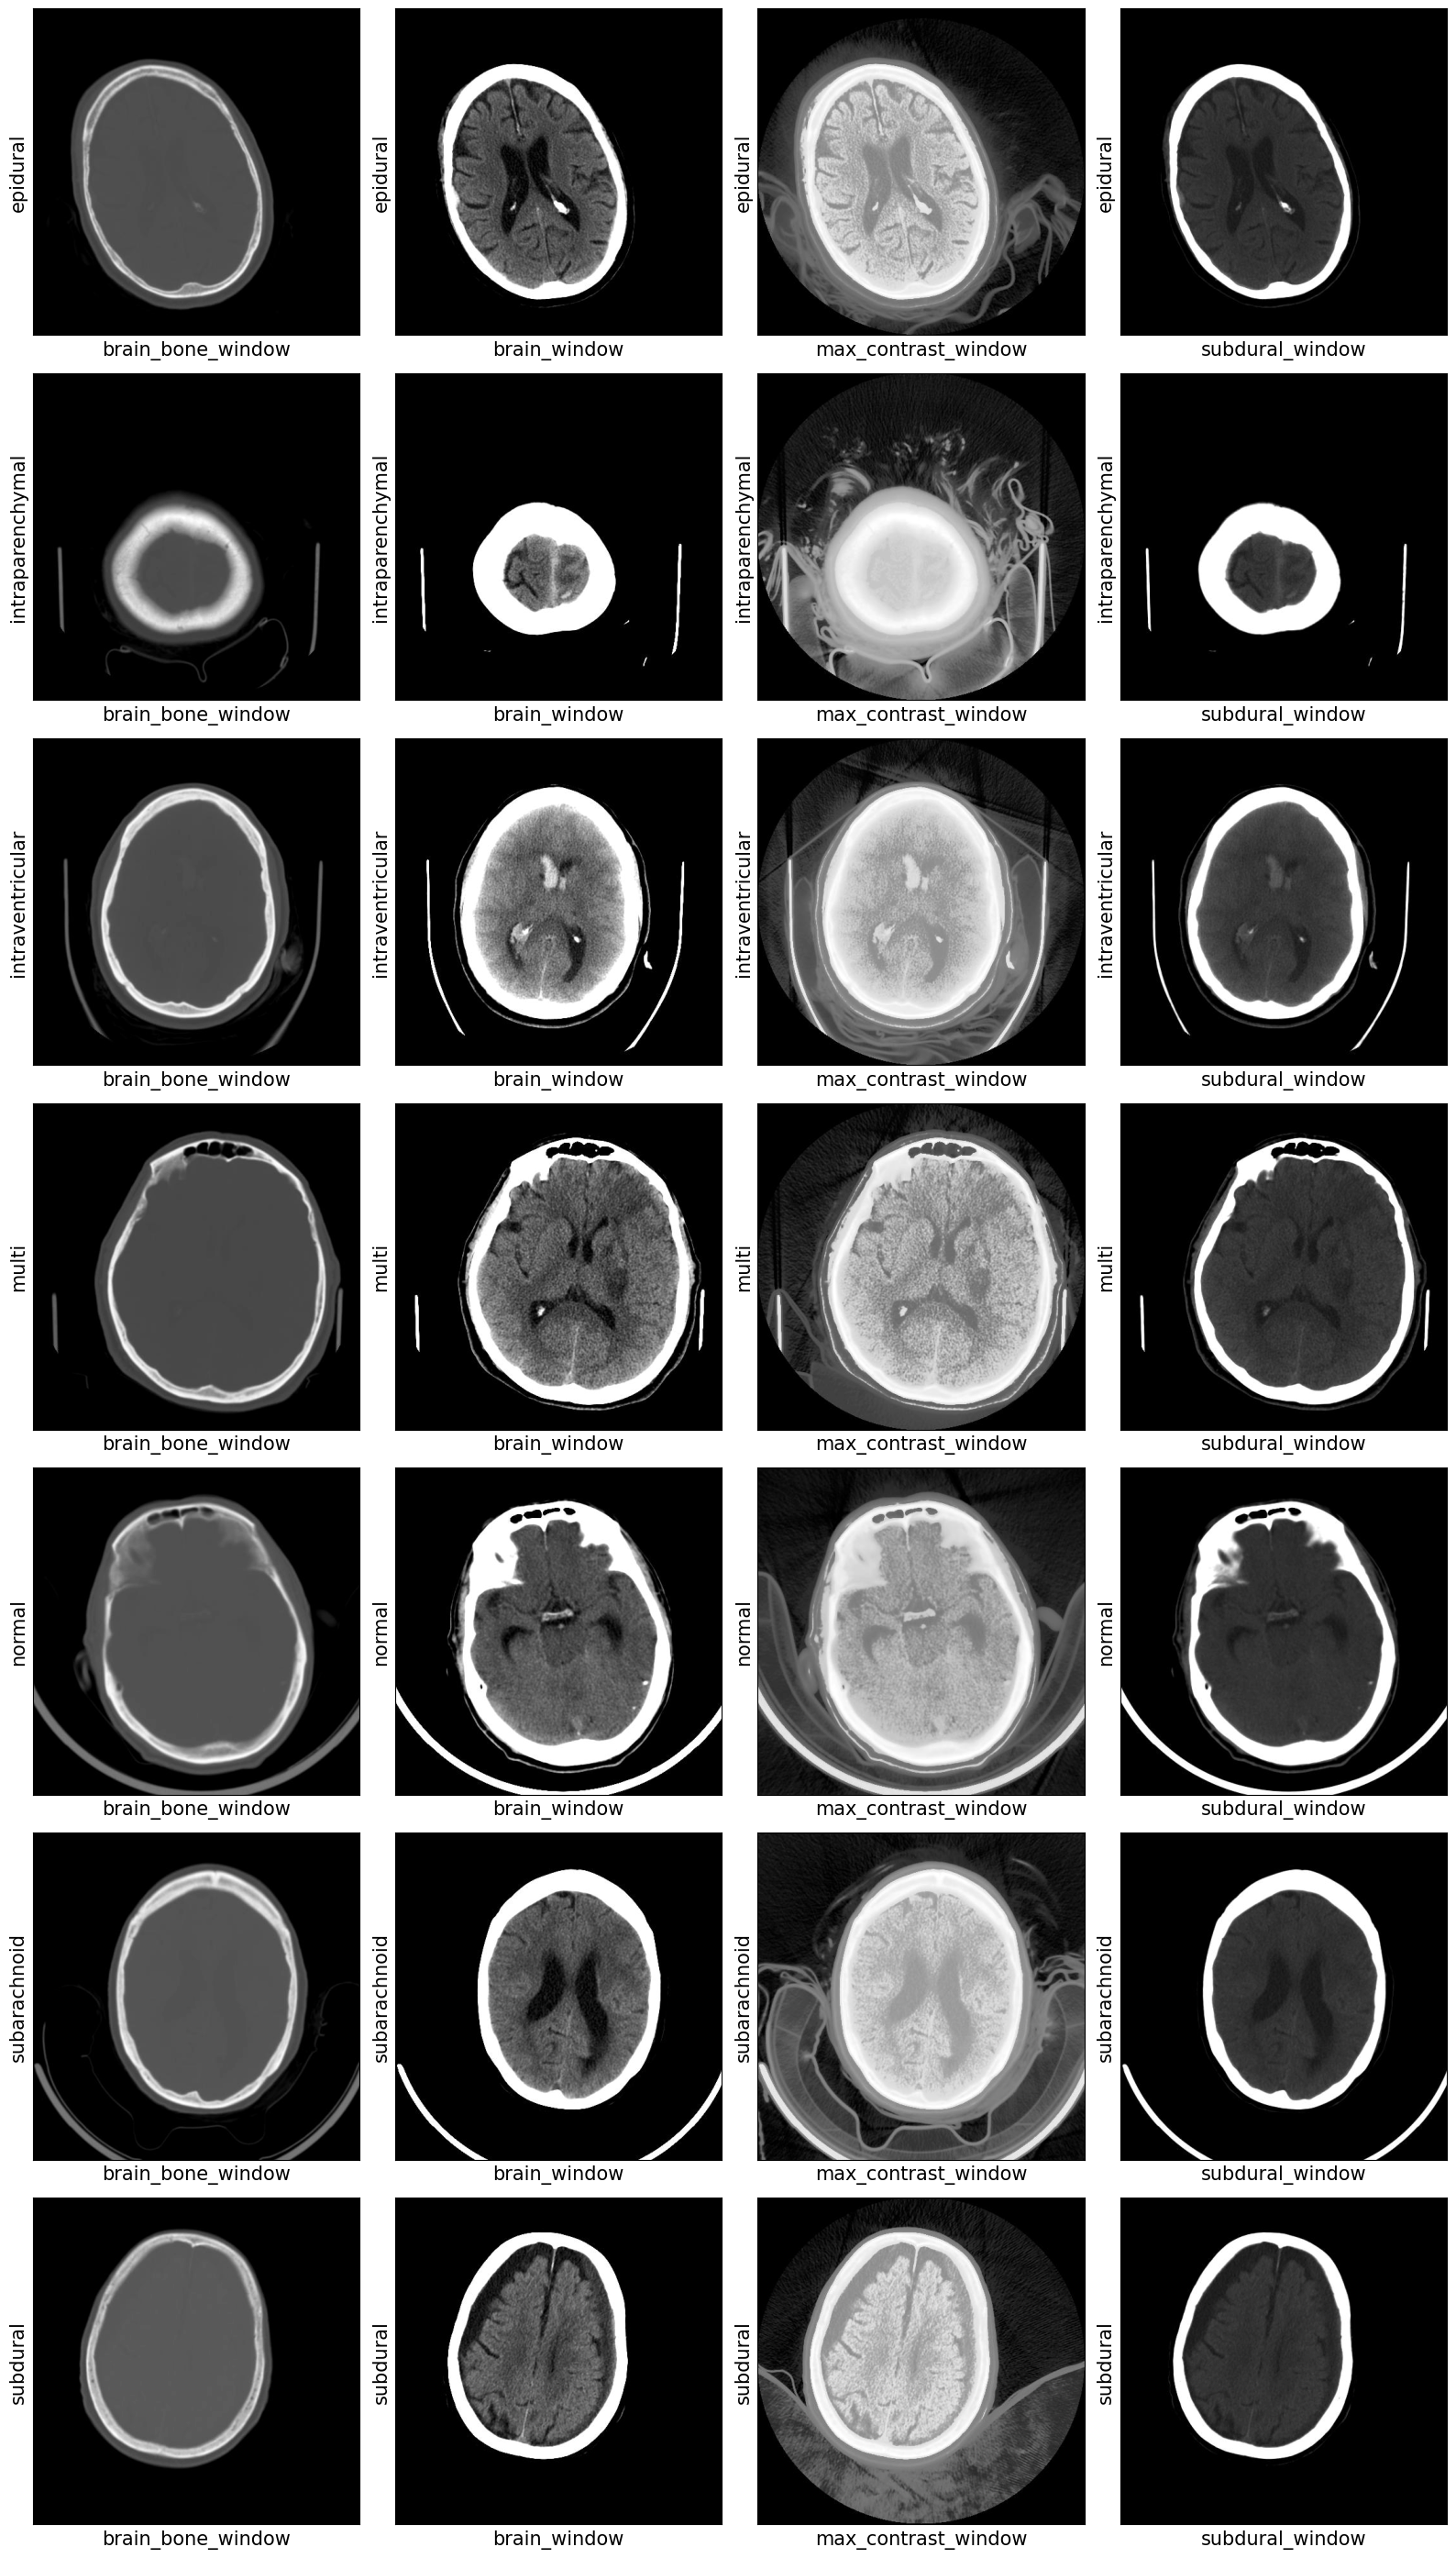

In [6]:
from pathlib import Path

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 4, nrows * 4))

for i, folder_path in enumerate(directories):
    folder_paths = sorted(glob.glob(folder_path + "/*"))  # Ensure consistent ordering

    for j, folder in enumerate(folder_paths):
        all_files = sorted(glob.glob(folder + '/*'))  # Get all images in the folder
        if not all_files:
            print(f"Warning: No images found in {folder}")
            continue  # Skip if folder is empty

        subfolder_path = Path(folder).parts[-2:]  # Extract hemorrhage type & window name
        hemorrhage_type, window = subfolder_path

        if j == 0:
            img_path = random.choice(all_files)  # Pick a random image

        # Construct the correct path for the selected image
        img_path = Path(img_path)
        base_folder = img_path.parents[1]  # Get base directory (two levels up)
        img_name = base_folder / window / img_path.name  # Correct path reconstruction

        # Read and display the image
        img = cv.imread(str(img_name), cv.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Error: Could not read image at {img_name}")
            continue  # Skip this image if unreadable

        ax[i, j].imshow(img, cmap='gray')
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])

        # Set labels
        ax[i, j].set_ylabel(hemorrhage_type, fontsize=15)
        ax[i, j].set_xlabel(window, fontsize=15)

plt.tight_layout()
plt.show()


In [7]:
for folder in glob.glob(folder_path+"/*"):
    print(folder)
    break

C:/Users/mtwhe/OneDrive/Desktop/MATH7243 - ML and Stat Theory/Final Project/renders\subdural\brain_bone_window


In [8]:
folder

'C:/Users/mtwhe/OneDrive/Desktop/MATH7243 - ML and Stat Theory/Final Project/renders\\subdural\\brain_bone_window'

In [9]:
img = random.choice(os.listdir(folder))

In [10]:
img = random.choice(glob.glob(folder+'/*'))

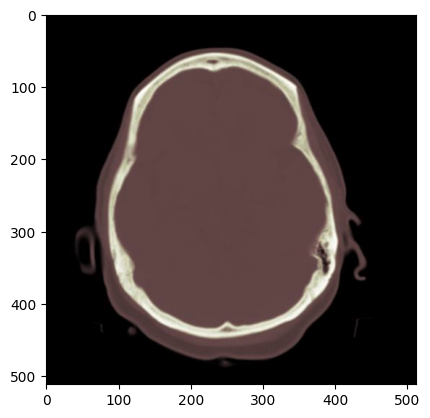

In [11]:
plt.imshow(cv.imread(img), cmap='gray')

In [12]:
np.unique(cv.imread(img), return_counts=True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

## check csv files data

In [13]:
epidural = pd.read_csv("C:/Users/mtwhe/OneDrive/Desktop/MATH7243 - ML and Stat Theory/Final Project/Hemorrhage Segmentation Project-20210928T021515Z-001/Hemorrhage Segmentation Project/Results_Epidural Hemorrhage Detection_2020-11-16_21.31.26.148.csv")
intraparenchymal = pd.read_csv("C:/Users/mtwhe/OneDrive/Desktop/MATH7243 - ML and Stat Theory/Final Project/Hemorrhage Segmentation Project-20210928T021515Z-001/Hemorrhage Segmentation Project/Results_Intraparenchymal Hemorrhage Detection_2020-11-16_21.39.31.268.csv")
multi = pd.read_csv("C:/Users/mtwhe/OneDrive/Desktop/MATH7243 - ML and Stat Theory/Final Project/Hemorrhage Segmentation Project-20210928T021515Z-001/Hemorrhage Segmentation Project/Results_Multiple Hemorrhage Detection_2020-11-16_21.36.24.018.csv")
subdural = pd.read_csv("C:/Users/mtwhe/OneDrive/Desktop/MATH7243 - ML and Stat Theory/Final Project/Hemorrhage Segmentation Project-20210928T021515Z-001/Hemorrhage Segmentation Project/Results_Subdural Hemorrhage Detection_2020-11-16_21.35.48.040.csv")
subarachnoid = pd.read_csv("C:/Users/mtwhe/OneDrive/Desktop/MATH7243 - ML and Stat Theory/Final Project/Hemorrhage Segmentation Project-20210928T021515Z-001/Hemorrhage Segmentation Project/Results_Subarachnoid Hemorrhage Detection_2020-11-16_21.36.18.668.csv")

hemmorrhage_labels = pd.read_csv("C:/Users/mtwhe/OneDrive/Desktop/MATH7243 - ML and Stat Theory/Final Project/Hemorrhage Segmentation Project-20210928T021515Z-001/Hemorrhage Segmentation Project/hemorrhage-labels.csv")


In [14]:
epidural.shape, intraparenchymal.shape, multi.shape, subdural.shape, subarachnoid.shape

((610, 14), (1289, 14), (1054, 14), (752, 14), (1031, 14))

In [15]:
epidural.isna().sum()

Case ID                    0
Origin                     0
URL                        0
Labeling State             0
All Labels                 0
Total Reads                0
Total Qualified Reads      0
Majority Label             0
Number of ROIs             0
Correct Label            300
Difficulty               301
Agreement                  0
Comments                 605
Internal Notes           610
dtype: int64

In [16]:
epidural.head()

,Case ID,Origin,URL,Labeling State,All Labels,Total Reads,Total Qualified Reads,Majority Label,Number of ROIs,Correct Label,Difficulty,Agreement,Comments,Internal Notes
0,1196514,ID_004c4b319.jpg,https://go.centaurlabs.com/problem/1196514,Labeled,"['[{""x"": 0.40818718, ""y"": 0.8623607}, {""x"": 0....",19.0,5.0,"[{""x"": 0.537109375, ""y"": 0.89453125}, {""x"": 0....",1.0,"[[{'x': 0.537109375, 'y': 0.89453125}, {'x': 0...",0.00,0.968851,NaN,NaN
1,1196682,ID_0237b835f.jpg,https://go.centaurlabs.com/problem/1196682,Ready,"['[{""x"": 0.62959146, ""y"": 0.720186}, {""x"": 0.6...",51.0,28.0,"[{""x"": 0.654296875, ""y"": 0.724609375}, {""x"": 0...",1.0,NaN,NaN,0.063519,NaN,NaN
2,1196477,ID_02e2d273d.jpg,https://go.centaurlabs.com/problem/1196477,Labeled,"['[{""x"": 0.35205495, ""y"": 0.34680602}, {""x"": 0...",22.0,6.0,"[{""x"": 0.46484375, ""y"": 0.357421875}, {""x"": 0....",1.0,"[[{'x': 0.46484375, 'y': 0.357421875}, {'x': 0...",0.06,0.710300,NaN,NaN
3,1196612,ID_02f37ce84.jpg,https://go.centaurlabs.com/problem/1196612,Ready,"['[{""x"": 0.3680166, ""y"": 0.48387372}, {""x"": 0....",51.0,29.0,"[{""x"": 0.431640625, ""y"": 0.607421875}, {""x"": 0...",2.0,NaN,NaN,0.264134,NaN,NaN
4,1196612,ID_02f37ce84.jpg,https://go.centaurlabs.com/problem/1196612,Ready,"['[{""x"": 0.3680166, ""y"": 0.48387372}, {""x"": 0....",51.0,29.0,"[{""x"": 0.353515625, ""y"": 0.59765625}, {""x"": 0....",2.0,NaN,NaN,0.264134,NaN,NaN


In [17]:
intraparenchymal.head()

,Case ID,Origin,URL,Labeling State,All Labels,Total Reads,Total Qualified Reads,Majority Label,Number of ROIs,Correct Label,Difficulty,Agreement,Comments,Internal Notes
0,1675660,ID_0002081b6.jpg,https://go.centaurlabs.com/problem/1675660,In Progress,"['[{""x"": 0.31658885, ""y"": 0.48357323}, {""x"": 0...",22.0,9.0,"[{""x"": 0.3046875, ""y"": 0.484375}, {""x"": 0.3046...",1.0,NaN,NaN,0.224542,NaN,NaN
1,1675942,ID_0048e60a4.jpg,https://go.centaurlabs.com/problem/1675942,In Progress,"['[{""x"": 0.54811704, ""y"": 0.5961946}, {""x"": 0....",22.0,7.0,"[{""x"": 0.5859375, ""y"": 0.640625}, {""x"": 0.5859...",1.0,NaN,NaN,0.772365,NaN,NaN
2,1197689,ID_0057d2736.jpg,https://go.centaurlabs.com/problem/1197689,Labeled,"['[{""x"": 0.3040109, ""y"": 0.52168596}, {""x"": 0....",46.0,9.0,"[{""x"": 0.3046875, ""y"": 0.521484375}, {""x"": 0.3...",1.0,"[[{'x': 0.3046875, 'y': 0.521484375}, {'x': 0....",0.02,0.738368,NaN,NaN
3,1197754,ID_007cac3b7.jpg,https://go.centaurlabs.com/problem/1197754,Labeled,"['[{""x"": 0.41792268, ""y"": 0.56897116}, {""x"": 0...",51.0,10.0,"[{""x"": 0.41015625, ""y"": 0.615234375}, {""x"": 0....",1.0,"[[{'x': 0.4140625, 'y': 0.6171875}, {'x': 0.41...",0.03,0.618086,NaN,NaN
4,1675775,ID_00b46c6bc.jpg,https://go.centaurlabs.com/problem/1675775,In Progress,"['[{""x"": 0.82215744, ""y"": 0.20116618}, {""x"": 0...",22.0,6.0,"[{""x"": 0.365234375, ""y"": 0.693359375}, {""x"": 0...",1.0,NaN,NaN,0.006388,NaN,NaN


In [18]:
intraparenchymal.loc[0, "All Labels"]

'[\'[{"x": 0.31658885, "y": 0.48357323}, {"x": 0.3329847, "y": 0.4722452}, {"x": 0.34431273, "y": 0.47313952}, {"x": 0.3580256, "y": 0.4677736}, {"x": 0.36786312, "y": 0.45733988}, {"x": 0.37561387, "y": 0.44660807}, {"x": 0.38902867, "y": 0.43766487}, {"x": 0.4006548, "y": 0.42991412}, {"x": 0.40214533, "y": 0.42186522}, {"x": 0.39230782, "y": 0.41649932}, {"x": 0.38545138, "y": 0.40368077}, {"x": 0.37919116, "y": 0.3971224}, {"x": 0.3729309, "y": 0.38698682}, {"x": 0.36577636, "y": 0.37953416}, {"x": 0.36011234, "y": 0.38013035}, {"x": 0.33179227, "y": 0.37953416}, {"x": 0.32583013, "y": 0.37863985}, {"x": 0.31509832, "y": 0.37565878}, {"x": 0.2995968, "y": 0.3777455}, {"x": 0.291846, "y": 0.3863906}, {"x": 0.29154792, "y": 0.3917565}, {"x": 0.28528768, "y": 0.39861295}, {"x": 0.2718729, "y": 0.41292205}, {"x": 0.26889184, "y": 0.42126903}, {"x": 0.2706805, "y": 0.43289518}, {"x": 0.27395964, "y": 0.4442232}, {"x": 0.28260472, "y": 0.46002284}, {"x": 0.29661572, "y": 0.4776111}]\'\n 

In [19]:
hemmorrhage_labels.head(20)

,Image,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
0,ID_000012eaf,0,0,0,0,0,0
1,ID_000039fa0,0,0,0,0,0,0
2,ID_00005679d,0,0,0,0,0,0
3,ID_00008ce3c,0,0,0,0,0,0
4,ID_0000950d7,0,0,0,0,0,0
5,ID_0000aee4b,0,0,0,0,0,0
6,ID_0000ca2f6,0,0,0,0,0,0
7,ID_0000f1657,0,0,0,0,0,0
8,ID_000178e76,0,0,0,0,0,0
9,ID_00019828f,0,0,0,0,0,0


In [20]:
hemmorrhage_labels.shape

(752803, 7)

In [21]:
epidural_brain_bone_files = glob.glob("C:/Users/mtwhe/OneDrive/Desktop/MATH7243 - ML and Stat Theory/Final Project/renders/epidural/brain_bone_window/*.jpg")

In [22]:
len(epidural_brain_bone_files)

1694

In [23]:
epidural_brain_window_files = glob.glob("C:/Users/mtwhe/OneDrive/Desktop/MATH7243 - ML and Stat Theory/Final Project/renders/epidural/brain_window/*.jpg")

In [24]:
len(epidural_brain_window_files)

1694

In [25]:
intraparenchymal_brain_bone_files = glob.glob("C:/Users/mtwhe/OneDrive/Desktop/MATH7243 - ML and Stat Theory/Final Project/renders/intraparenchymal/brain_bone_window/*.jpg")

In [26]:
len(intraparenchymal_brain_bone_files)

15664

In [27]:
epidural_brain_bone_files[7].split('.')[0].split('/')[-1] in hemmorrhage_labels['Image'].values

False

In [28]:
'ID_00008ce3c' in hemmorrhage_labels['Image'].values

True

In [29]:
global_all_files = []  # Store all images globally

count_images = 0
for i, folder_path in enumerate(directories):
    for j, folder in enumerate(glob.glob(folder_path + "/*")):
        current_files = glob.glob(folder+'/*')  # Get images in current folder
        global_all_files.extend(current_files)  # Add to the master list

# Now, `global_all_files` contains all image paths

In [30]:
from sklearn.model_selection import train_test_split

# 🔹 Load hemorrhage labels
labels_df = hemmorrhage_labels
labels_df.fillna(0, inplace=True)  # Replace NaNs with 0s

# 🔹 Create a dictionary mapping image IDs to labels
label_dict = {row["Image"]: row.iloc[1:].values for _, row in labels_df.iterrows()}

subset_size = 50_000  # Adjust based on your needs
small_sample_files = random.sample(global_all_files, subset_size)  # Randomly sample images

X, y = [], []
img_size = (64, 64)

for img_path in small_sample_files:  
    img_id = os.path.basename(img_path).split('.')[0]

    if img_id in label_dict:
        img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Warning: Could not read {img_path}")
            continue
        
        img = cv.resize(img, img_size)
        img = img / 255.0
        X.append(img.flatten())  # Flatten image to 1D
        y.append(label_dict[img_id])

X = np.array(X)
y = np.array(y, dtype=int)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# 🔹 Flattened image data (X) and multilabel targets (y) are already prepared
# y is assumed to be multilabel (e.g., 5 hemorrhage types), so we need a multi-output classifier

# Train/test split already done:
# X_train, X_test, y_train, y_test

# 🔹 Create and train the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 🔹 Predict on test set
y_pred = clf.predict(X_test)

# 🔹 Evaluate the model
print("Accuracy (overall):", accuracy_score(y_test, y_pred))
print("\nDetailed classification report:\n")
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy (overall): 0.1977

Detailed classification report:

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      9259
           1       0.05      0.06      0.05       254
           2       0.36      0.36      0.36      3028
           3       0.36      0.36      0.36      2311
           4       0.35      0.37      0.36      3087
           5       0.46      0.47      0.47      4013

   micro avg       0.61      0.62      0.62     21952
   macro avg       0.42      0.43      0.42     21952
weighted avg       0.62      0.62      0.62     21952
 samples avg       0.58      0.59      0.57     21952



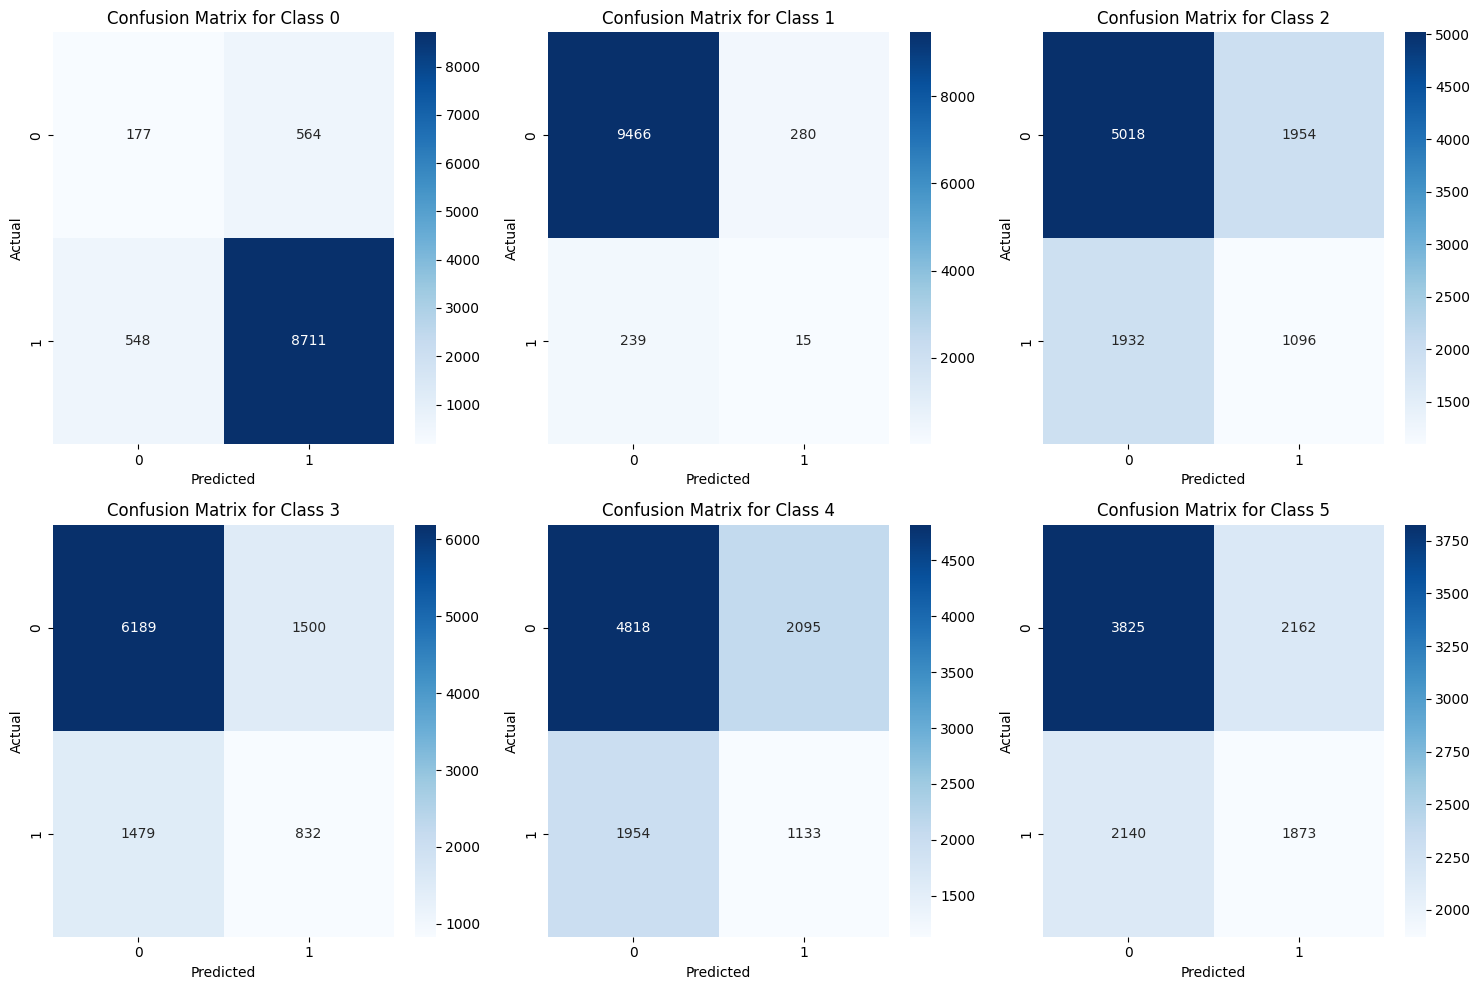

In [40]:
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns (for 6 hemorrhage types)

for i, ax in enumerate(axes.flat):
    if i < y.shape[1]:  # Ensure we don't plot empty graphs
        cm = confusion_matrix(y_test[:, i], y_pred[:, i])
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
        ax.set_title(f'Confusion Matrix for Class {i}')
        ax.set_xlabel("Predicted")
        ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined from your preprocessing

# 🔹 Create and train the Random Forest model
rf_clf = RandomForestClassifier(
    n_estimators=500,        # Number of trees
    max_depth=None,          # Let trees grow until all leaves are pure
    random_state=42,
    n_jobs=-1                # Use all available CPU cores
)
rf_clf.fit(X_train, y_train)

# 🔹 Predict on the test set
y_pred = rf_clf.predict(X_test)

# 🔹 Evaluate performance
print("Accuracy (overall):", accuracy_score(y_test, y_pred))
print("\nDetailed classification report:\n")
print(classification_report(y_test, y_pred, zero_division=0))


Accuracy (overall): 0.1149

Detailed classification report:

              precision    recall  f1-score   support

           0       0.93      1.00      0.97      9259
           1       0.00      0.00      0.00       254
           2       0.84      0.04      0.07      3028
           3       0.73      0.09      0.17      2311
           4       0.86      0.02      0.03      3087
           5       0.64      0.30      0.41      4013

   micro avg       0.88      0.49      0.63     21952
   macro avg       0.67      0.24      0.27     21952
weighted avg       0.83      0.49      0.51     21952
 samples avg       0.89      0.48      0.60     21952



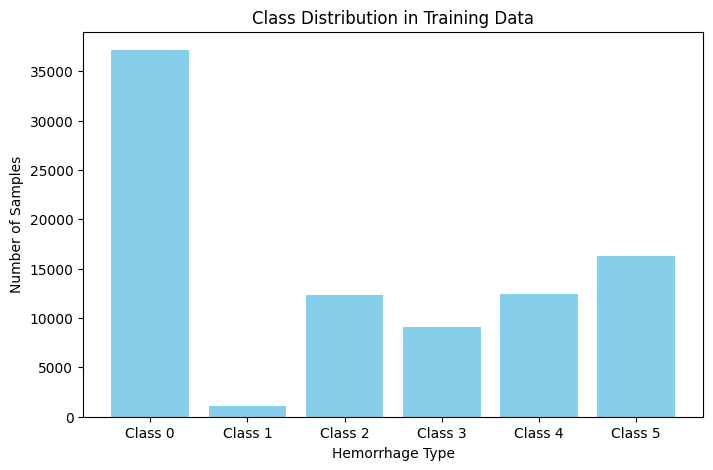

In [34]:
# Count samples per hemorrhage type in y_train
class_counts = np.sum(y_train, axis=0)  # Sum along columns to count each class

plt.figure(figsize=(8, 5))
plt.bar(range(y.shape[1]), class_counts, color='skyblue')
plt.xticks(range(y.shape[1]), [f'Class {i}' for i in range(y.shape[1])])
plt.xlabel("Hemorrhage Type")
plt.ylabel("Number of Samples")
plt.title("Class Distribution in Training Data")
plt.show()


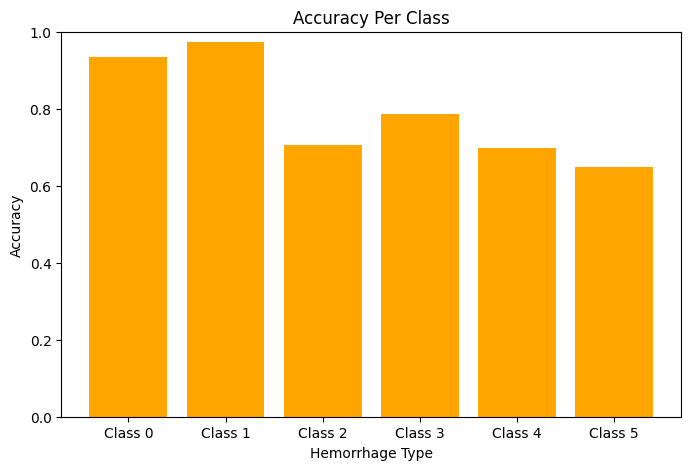

In [35]:
from sklearn.metrics import accuracy_score

# Calculate accuracy per class
accuracies = [accuracy_score(y_test[:, i], y_pred[:, i]) for i in range(y.shape[1])]

plt.figure(figsize=(8, 5))
plt.bar(range(y.shape[1]), accuracies, color='orange')
plt.xticks(range(y.shape[1]), [f'Class {i}' for i in range(y.shape[1])])
plt.ylim(0, 1)
plt.xlabel("Hemorrhage Type")
plt.ylabel("Accuracy")
plt.title("Accuracy Per Class")
plt.show()


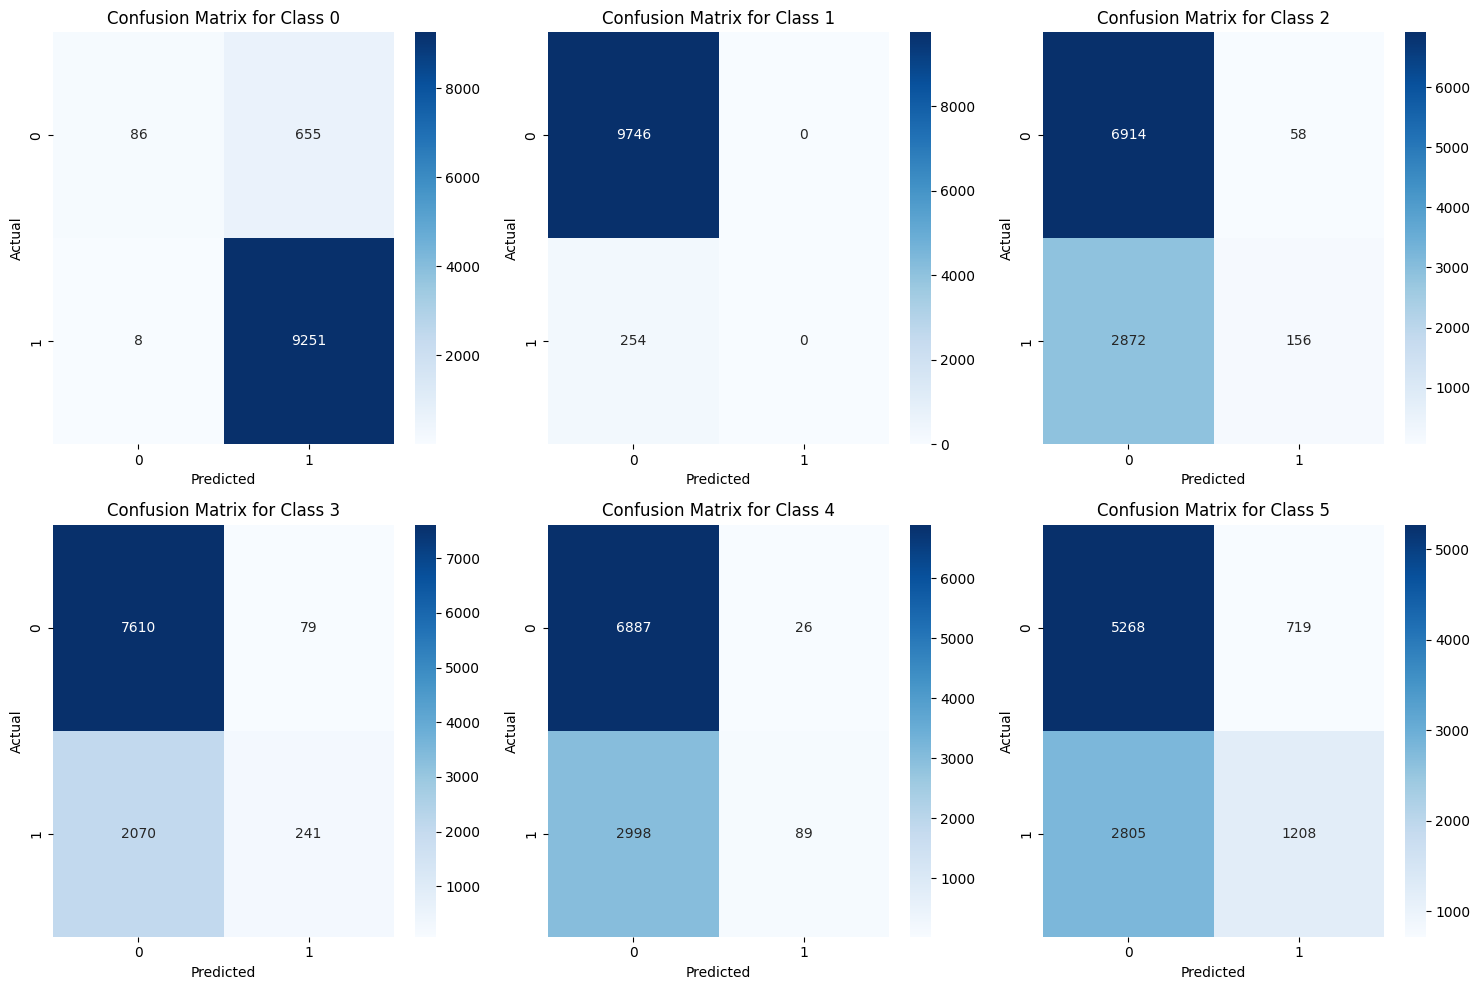

In [36]:
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns (for 6 hemorrhage types)

for i, ax in enumerate(axes.flat):
    if i < y.shape[1]:  # Ensure we don't plot empty graphs
        cm = confusion_matrix(y_test[:, i], y_pred[:, i])
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
        ax.set_title(f'Confusion Matrix for Class {i}')
        ax.set_xlabel("Predicted")
        ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()


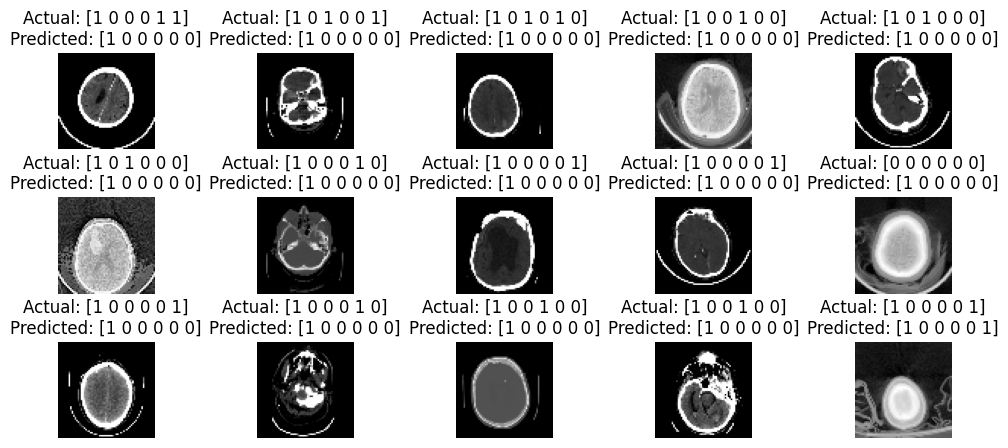

In [37]:
# Select random images
num_samples = 15
sample_indices = random.sample(range(len(X_test)), num_samples)

plt.figure(figsize=(12, 5))

for i, idx in enumerate(sample_indices):
    img = X_test[idx].reshape(64, 64)  # Reshape back to 64x64 image

    true_labels = y_test[idx]
    pred_labels = y_pred[idx]

    plt.subplot(3, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.axis("off")
    plt.title(f"Actual: {true_labels}\nPredicted: {pred_labels}")

# 🔹 Adjust spacing between images
plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Increase horizontal & vertical spacing
plt.show()
